In [58]:
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score, balanced_accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sn
import torch
import joblib

path_csv = "../../../../Thesis_data/processed_data/"
path_model = "../../../../Thesis_data/Models/"

In [59]:
#https://mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas

def rm(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    for col in df.columns:
        col_type = df[col].dtype
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [60]:
results = pd.DataFrame(columns=["Model", "AUROC", "Balanced Accuracy", "F1", "Recall", "Precision"])

def evaluation(y_test_input, y_pred_input, model_name):

    auroc = roc_auc_score(y_test_input, y_pred_input)
    bal_acc = balanced_accuracy_score(y_test_input, y_pred_input)
    f1 = f1_score(y_test_input, y_pred_input)
    recall = recall_score(y_test_input, y_pred_input)
    precis = precision_score(y_test_input, y_pred_input)

    results.loc[len(results)+1] = [type(model_name).__name__, auroc, bal_acc, f1, recall, precis]

    print("AUROC Score: ", auroc)
    print("Balanced Accuracy Score: ", bal_acc)
    print("Accuracy Score: ", f1)
    print("Recall Score: ", recall)
    print("Precision Score: ", precis)
    cm = confusion_matrix(y_test_input, y_pred_input)

    fig, ax = plt.subplots(figsize=(4, 6))
    ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='xx-large')
    
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

In [61]:
X_test = pd.read_csv(path_csv + "ontime_reporting_X_test.csv")
y_test = pd.read_csv(path_csv + "ontime_reporting_y_test.csv")

In [62]:
X_test = rm(X_test) #I think this breaks TabNet .fit function
y_test = np.ravel(y_test)

Memory usage of dataframe is 314.23 MB
Memory usage after optimization is: 78.56 MB
Decreased by 75.0%


## Evaluate Logistic Regression baseline model

In [63]:
logreg_baseline = pickle.load(open(path_model + "logreg_baseline.pkl", "rb"))
y_pred_logreg_baseline = logreg_baseline.predict(X_test)

AUROC Score:  0.6633863398606267
Balanced Accuracy Score:  0.6633863398606267
Accuracy Score:  0.4732462774510945
Recall Score:  0.3774041893087926
Precision Score:  0.6343365351547191


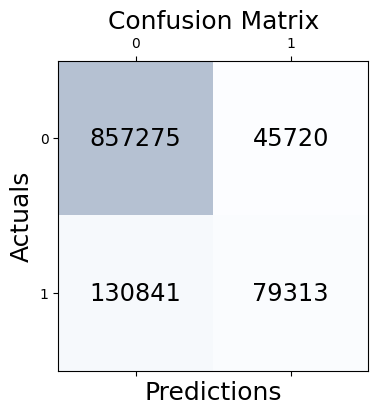

In [64]:
evaluation(y_test, y_pred_logreg_baseline, logreg_baseline)

## Evaluate XGBoost baseline model

In [65]:
xgb_class_baseline = pickle.load(open(path_model + "XGBoost_baseline.pkl", "rb"))
y_pred_xgb_baseline = xgb_class_baseline.predict(X_test)

AUROC Score:  0.6653023976705982
Balanced Accuracy Score:  0.6653023976705982
Accuracy Score:  0.4804495448758849
Recall Score:  0.3708375762536045
Precision Score:  0.6820493072998258


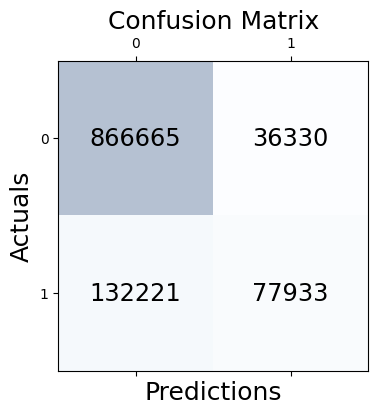

In [66]:
evaluation(y_test, y_pred_xgb_baseline, xgb_class_baseline)

## Evaluate TabNet baseline model

In [67]:
model = torch.load(path_model + "TabNet_baseline.pt")
y_pred_tabnet_baseline = model.predict(X_test.values)

AUROC Score:  0.6619356483045754
Balanced Accuracy Score:  0.6619356483045754
Accuracy Score:  0.47295091022918384
Recall Score:  0.3666644460728799
Precision Score:  0.6660097840930699


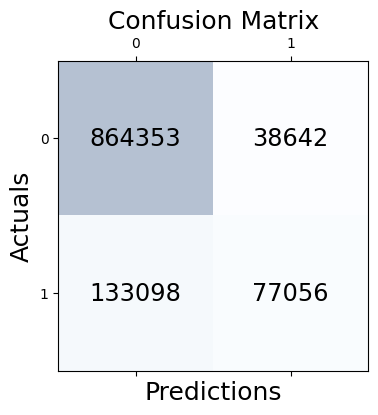

In [68]:
evaluation(y_test, y_pred_tabnet_baseline, model)

## Evaluate Random Forests baseline model

In [69]:
#rf_baseline = pickle.load(open(path_model + "rf_baseline.pkl", "rb"))
rf_baseline = joblib.load(path_model + "rf_baseline.joblib")
y_pred_rf_baseline = rf_baseline.predict(X_test)

C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
C:\Users\Rvanl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


AUROC Score:  0.6691951724734319
Balanced Accuracy Score:  0.6691951724734319
Accuracy Score:  0.48819187738710745
Recall Score:  0.3783130466229527
Precision Score:  0.6880246464856258


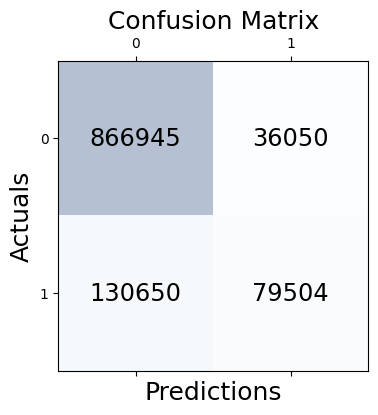

In [70]:
evaluation(y_test, y_pred_rf_baseline, rf_baseline)

In [71]:
results.sort_values(by=["AUROC"], ascending=False)

,Model,AUROC,Balanced Accuracy,F1,Recall,Precision
4,RandomForestClassifier,0.669195,0.669195,0.488192,0.378313,0.688025
2,XGBClassifier,0.665302,0.665302,0.480450,0.370838,0.682049
1,LogisticRegression,0.663386,0.663386,0.473246,0.377404,0.634337
3,TabNetClassifier,0.661936,0.661936,0.472951,0.366664,0.666010
